### Project Description:

To better understand the growth and impact of Bitcoin and other cryptocurrencies ,the market capitalization of different cryptocurrencies have been explored.

**Project purpose:**
Our ultimate purpose is to spot the big winners cryptocurrencies to invest money.

Warning: The cryptocurrency market is exceptionally volatile, and any money you put in might disappear into thin air. 

## Step 1. Open the data file and study the general information.

In [1]:
%pip install missingno
%pip install plotly.express as px
%pip install plotly.graph_objects as go

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plotly.graph_objects (from versions: none)
ERROR: No matching distribution found for plotly.graph_objects


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

In [3]:
crypto_df=pd.read_csv('coinmarketcap_06122017.csv')
display(crypto_df.head())
display(crypto_df.info())
display(crypto_df.isnull().sum())
crypto_df_filtered=crypto_df[['id','market_cap_usd','percent_change_1h','percent_change_24h','percent_change_7d']]
display(crypto_df_filtered.head())
display(crypto_df_filtered.info())
display(crypto_df_filtered.isnull().sum())

#checking duplicates in dataframe
print('duplicate rows:',crypto_df_filtered.duplicated().sum())

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

None

Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

,id,market_cap_usd,percent_change_1h,percent_change_24h,percent_change_7d
0,bitcoin,2.130493e+11,0.12,7.33,17.45
1,ethereum,4.352945e+10,-0.18,-3.93,-7.33
2,bitcoin-cash,2.529585e+10,1.65,-5.51,-4.75
3,iota,1.475225e+10,-2.38,83.35,255.82
4,ripple,9.365343e+09,0.56,-3.70,-14.79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1326 non-null   object 
 1   market_cap_usd      1031 non-null   float64
 2   percent_change_1h   1273 non-null   float64
 3   percent_change_24h  1270 non-null   float64
 4   percent_change_7d   1283 non-null   float64
dtypes: float64(4), object(1)
memory usage: 51.9+ KB


None

id                      0
market_cap_usd        295
percent_change_1h      53
percent_change_24h     56
percent_change_7d      43
dtype: int64

duplicate rows: 0


* Conclusion:
    
In the beginning, the datasets have been opened and the general information have been analyzed .The data set has 1326 rows, 16 columns. Most of the missing values are in max_supply columns. Also market_cap_usd,available_supply,percent_change_1h, percent_change_24h and percent_change_7d column has some missing values.No duplicated row were observed.

## Step 2. Data preprocessing

In [4]:
#dealing with null values
missing_list=[]
for x in crypto_df_filtered:
    if len(crypto_df_filtered[crypto_df_filtered[x].isnull()])>0:
        missing_list.append(x)
print(missing_list)

missing_perc=[]
for x in missing_list:
    missing_perc.append([x,(len(crypto_df_filtered[crypto_df_filtered[x].isnull()])/len(crypto_df_filtered))])
missing_perc=pd.DataFrame(missing_perc,columns=['column','missing %'])
missing_perc.sort_values(by=['missing %'],ascending=False)


['market_cap_usd', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d']


,column,missing %
0,market_cap_usd,0.222474
2,percent_change_24h,0.042232
1,percent_change_1h,0.039970
3,percent_change_7d,0.032428


    
**Conclusion:**
    
The missing columns have been identified in the crypto_df_filtered dataframe.The missing percentage have been also calculated.Highest missingness is found in the market_cap_usd column and then in the rating and user_score columns.

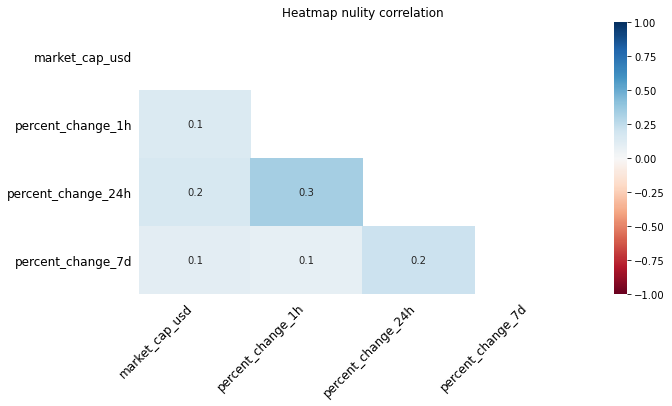

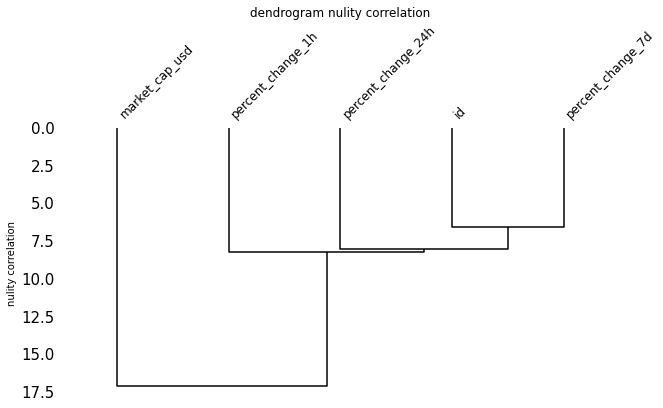

In [5]:
#checking missingness relation
#msno.dendrogram(games_df)
msno.heatmap(crypto_df_filtered,figsize=(10,5), fontsize=12)
plt.title('Heatmap nulity correlation')
msno.dendrogram(crypto_df_filtered, figsize=(10,5), fontsize=12);
plt.title('dendrogram nulity correlation')
plt.ylabel('nulity correlation')

plt.show()

**Conclusion:**

We can notice from this heatmap that percent_change_1h and percent_change_1h has a correlation of 0.3 which means that if the value from one column is missing then the value in another column will be missing as well


In [6]:
#Deleting the nan values in year_of_release column
drop_percent_change=crypto_df_filtered.query('percent_change_1h == "NaN" | percent_change_24h == "NaN" | percent_change_7d == "NaN" ')
crypto_df_filtered.drop(drop_percent_change.index, inplace=True)
display(crypto_df_filtered.info())
display(crypto_df_filtered.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1323
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1207 non-null   object 
 1   market_cap_usd      974 non-null    float64
 2   percent_change_1h   1207 non-null   float64
 3   percent_change_24h  1207 non-null   float64
 4   percent_change_7d   1207 non-null   float64
dtypes: float64(4), object(1)
memory usage: 56.6+ KB


C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


None

id                      0
market_cap_usd        233
percent_change_1h       0
percent_change_24h      0
percent_change_7d       0
dtype: int64

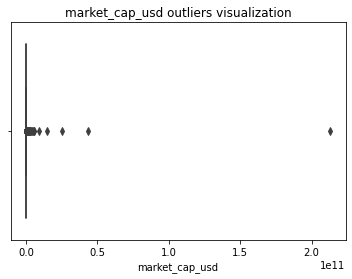

In [7]:
#checking outliers in market_cap_usd 
sns.boxplot(x=crypto_df_filtered['market_cap_usd'])
plt.title('market_cap_usd outliers visualization')
plt.show()

In [8]:
#null value of column user_score and critic_score is filled with the median value using trasnform method according to genre and year_of_release columns group value as it has outliers
crypto_df_filtered['market_cap_usd'] = crypto_df_filtered.groupby(['id'])['market_cap_usd'].transform(lambda x: x.fillna(x.median()))
median_market_cap=crypto_df_filtered['market_cap_usd'].median()
crypto_df_filtered['market_cap_usd'].fillna(median_market_cap, inplace=True)
display(crypto_df_filtered.describe())
display(crypto_df_filtered.isnull().sum())
display(crypto_df_filtered.head(10))
display(crypto_df_filtered.info())

<ipython-input-8-6007ce252f58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_df_filtered['market_cap_usd'] = crypto_df_filtered.groupby(['id'])['market_cap_usd'].transform(lambda x: x.fillna(x.median()))
C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,market_cap_usd,percent_change_1h,percent_change_24h,percent_change_7d
count,1.207000e+03,1207.000000,1207.000000,1207.000000
mean,3.104049e+08,1.036752,8.866835,29.814921
std,6.327078e+09,12.188987,44.761902,121.155152
min,1.000000e+01,-70.850000,-95.850000,-99.590000
25%,3.684735e+05,-0.205000,-6.925000,-7.510000
50%,1.863948e+06,0.520000,1.970000,11.570000
75%,1.035145e+07,1.040000,12.630000,36.725000
max,2.130493e+11,232.310000,833.010000,3360.710000


id                    0
market_cap_usd        0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
dtype: int64

,id,market_cap_usd,percent_change_1h,percent_change_24h,percent_change_7d
0,bitcoin,2.130493e+11,0.12,7.33,17.45
1,ethereum,4.352945e+10,-0.18,-3.93,-7.33
2,bitcoin-cash,2.529585e+10,1.65,-5.51,-4.75
3,iota,1.475225e+10,-2.38,83.35,255.82
4,ripple,9.365343e+09,0.56,-3.70,-14.79
5,dash,5.794076e+09,1.22,-3.31,10.64
6,litecoin,5.634498e+09,-0.17,0.80,3.68
7,bitcoin-gold,4.920065e+09,-0.86,-8.65,-11.24
8,monero,4.331688e+09,-2.00,25.65,41.23
9,cardano,3.231420e+09,-0.28,-5.80,-8.25


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1323
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1207 non-null   object 
 1   market_cap_usd      1207 non-null   float64
 2   percent_change_1h   1207 non-null   float64
 3   percent_change_24h  1207 non-null   float64
 4   percent_change_7d   1207 non-null   float64
dtypes: float64(4), object(1)
memory usage: 56.6+ KB


None

## 3. Data Analysis

### Question1 :How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>
At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a pie to better visualize this.</p>

,id,market_cap_usd,percent_change_1h,percent_change_24h,percent_change_7d
0,bitcoin,2.130493e+11,0.12,7.33,17.45
1,ethereum,4.352945e+10,-0.18,-3.93,-7.33
2,bitcoin-cash,2.529585e+10,1.65,-5.51,-4.75
3,iota,1.475225e+10,-2.38,83.35,255.82
4,ripple,9.365343e+09,0.56,-3.70,-14.79
5,dash,5.794076e+09,1.22,-3.31,10.64
6,litecoin,5.634498e+09,-0.17,0.80,3.68
7,bitcoin-gold,4.920065e+09,-0.86,-8.65,-11.24
8,monero,4.331688e+09,-2.00,25.65,41.23
9,cardano,3.231420e+09,-0.28,-5.80,-8.25


,market_cap_usd,percent_change_1h,percent_change_24h,percent_change_7d,market_cap_perc
id,,,,,
bitcoin,2.130493e+11,0.12,7.33,17.45,64.579199
ethereum,4.352945e+10,-0.18,-3.93,-7.33,13.194580
bitcoin-cash,2.529585e+10,1.65,-5.51,-4.75,7.667641
iota,1.475225e+10,-2.38,83.35,255.82,4.471679
ripple,9.365343e+09,0.56,-3.70,-14.79,2.838809
dash,5.794076e+09,1.22,-3.31,10.64,1.756291
litecoin,5.634498e+09,-0.17,0.80,3.68,1.707920
bitcoin-gold,4.920065e+09,-0.86,-8.65,-11.24,1.491363
monero,4.331688e+09,-2.00,25.65,41.23,1.313015


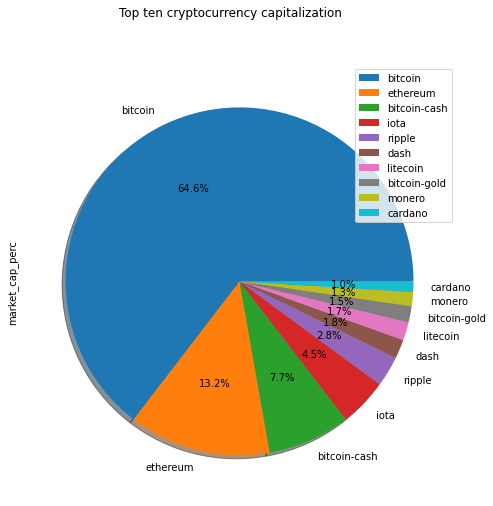

In [9]:
cap_top_10=crypto_df_filtered.head(10)
display(cap_top_10)
cap_top_10 = cap_top_10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap_top_10.market_cap_usd.sum())*100)
cap_top_10=cap_top_10.set_index('id')
display(cap_top_10)
cap_top_10.plot(y='market_cap_perc',kind='pie', style='o',subplots=True, shadow = True, figsize=(10,8),autopct='%1.1f%%',title="Top ten cryptocurrency capitalization")
plt.show()

* Conclusion:

Bitcoin have the highest capitalization comparing to all cryptocurrencies.

### Question 2: Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened.Let's explore this volatility a bit more and plot the top 10 biggest gainers and top 10 losers in market capitalization! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

,percent_change_24h
id,
fedoracoin,833.01
cashcoin,457.86
bitzeny,416.04
beatcoin,295.49
eaglecoin,272.50


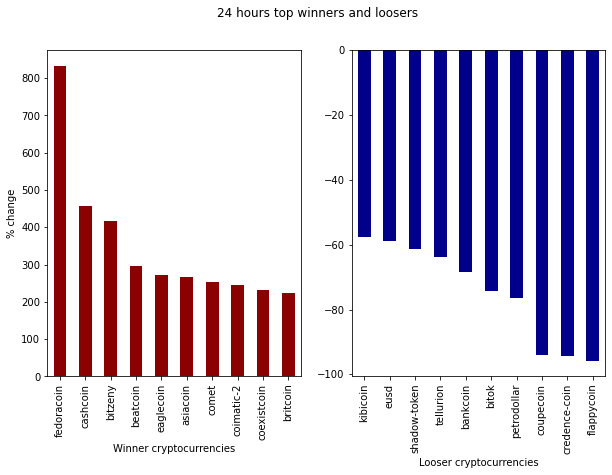

In [10]:
#% percentage change in 24H
percentage_24H= crypto_df_filtered[['id','percent_change_24h']].sort_values(by='percent_change_24h',ascending=False).set_index('id')
display(percentage_24H.head())

def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('% change')
    ax.set_xlabel('Winner cryptocurrencies')
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    ax.set_xlabel('Looser cryptocurrencies')
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top winners and loosers"


# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
fig, ax = top10_subplot(percentage_24H.percent_change_24h, DTITLE)


* Conclusion:

**Top three winners in 24H:**

1. fedoracin
2. cashcoin 
3. bitzeny

**Top three loosers in 24H:**

1. flappycoin 
2. credencecoin 
3. coupecoin

,percent_change_7d
id,
bitzeny,3360.71
bitcoin-red,693.37
btcmoon,582.11
comet,560.46
yoyow,547.12


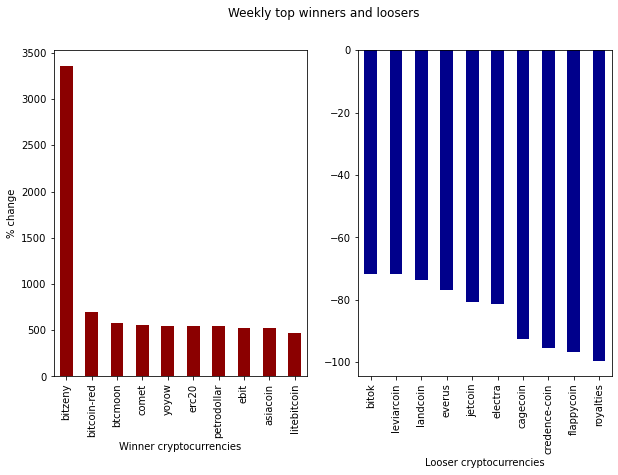

In [11]:
#% percentage change in 7 day
percentage_7d= crypto_df_filtered[['id','percent_change_7d']].sort_values(by='percent_change_7d',ascending=False).set_index('id')
display(percentage_7d.head())
WTITLE = 'Weekly top winners and loosers'
fig, ax = top10_subplot(percentage_7d.percent_change_7d, WTITLE)

* Conclusion:

**Top three winners in weekly:**
1. bitzeny
2. bitcoin-red 
3. btcmoon

**Top three loosers in weekly:**

1. royalties 
2. flappycoin
3. credence-coin

## Question 3: Selecting bigger than 10 billion capitalization
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones </p>

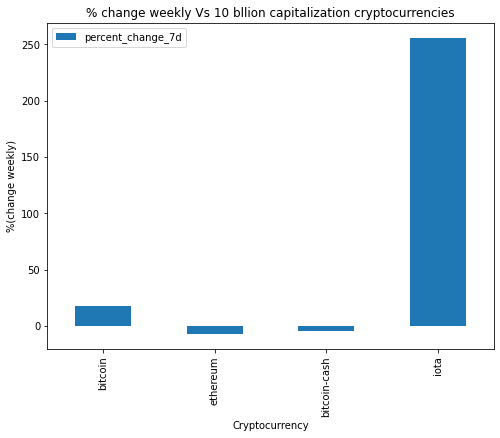

,market_cap_usd,percent_change_1h,percent_change_24h,percent_change_7d
id,,,,
bitcoin,2.130493e+11,0.12,7.33,17.45
ethereum,4.352945e+10,-0.18,-3.93,-7.33
bitcoin-cash,2.529585e+10,1.65,-5.51,-4.75
iota,1.475225e+10,-2.38,83.35,255.82


In [12]:
# Selecting everything bigger than 10 billion 
largecap = crypto_df_filtered.query('market_cap_usd > 1E+10')
largecap=largecap.set_index('id')
largecap.plot(y='percent_change_7d', kind='bar', figsize=(8,6))
plt.xlabel("Cryptocurrency")
plt.ylabel("%(change weekly)")
plt.title('% change weekly Vs 10 bllion capitalization cryptocurrencies')
plt.show()

plt.show()

# Printing out largecaps
display(largecap)

* Conclusion:

Bit coin have the highest capitalization(approx. two hundred thirteen billion) but weekly positive percentage change approx 18% .On the other hand, iota is top 4 capitalization(approx. fourteen billion) but 256% weekly positive percentage change.

## Question 4 : Count different marketcaps using three categories

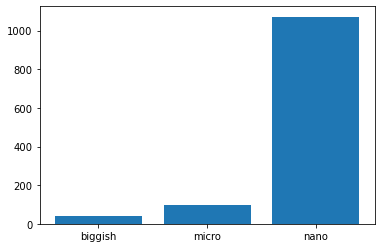

In [13]:
def capcount(value):
    return crypto_df_filtered.query(value).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the not_so_small cryptos
biggish = capcount("market_cap_usd > 3E+8")

# Same as above for micro
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# for nano
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.bar(range(len(values)), values, tick_label=LABELS);

* Conclusion:

Most of the crytocurrencies have very low capitalization and less than fifty million.

## Suggestion to invest money:¶

Bit coin have the highest capitalization(approx. two hundred thirteen billion) but weekly positive percentage change approx 18% .On the other hand, iota is top 4 capitalization(approx. fourteen billion) but 256% weekly positive percentage change.So if someone wants to invest money,I recommend iota crytocurrencies.But if someone does not want to take risk,I strongly recommend Bitcoin.